In [4]:
import numpy as np
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [5]:
file_path = os.path.join('DataSets', 'housing.csv')
df = pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df_clean = df

## Visualizing Data

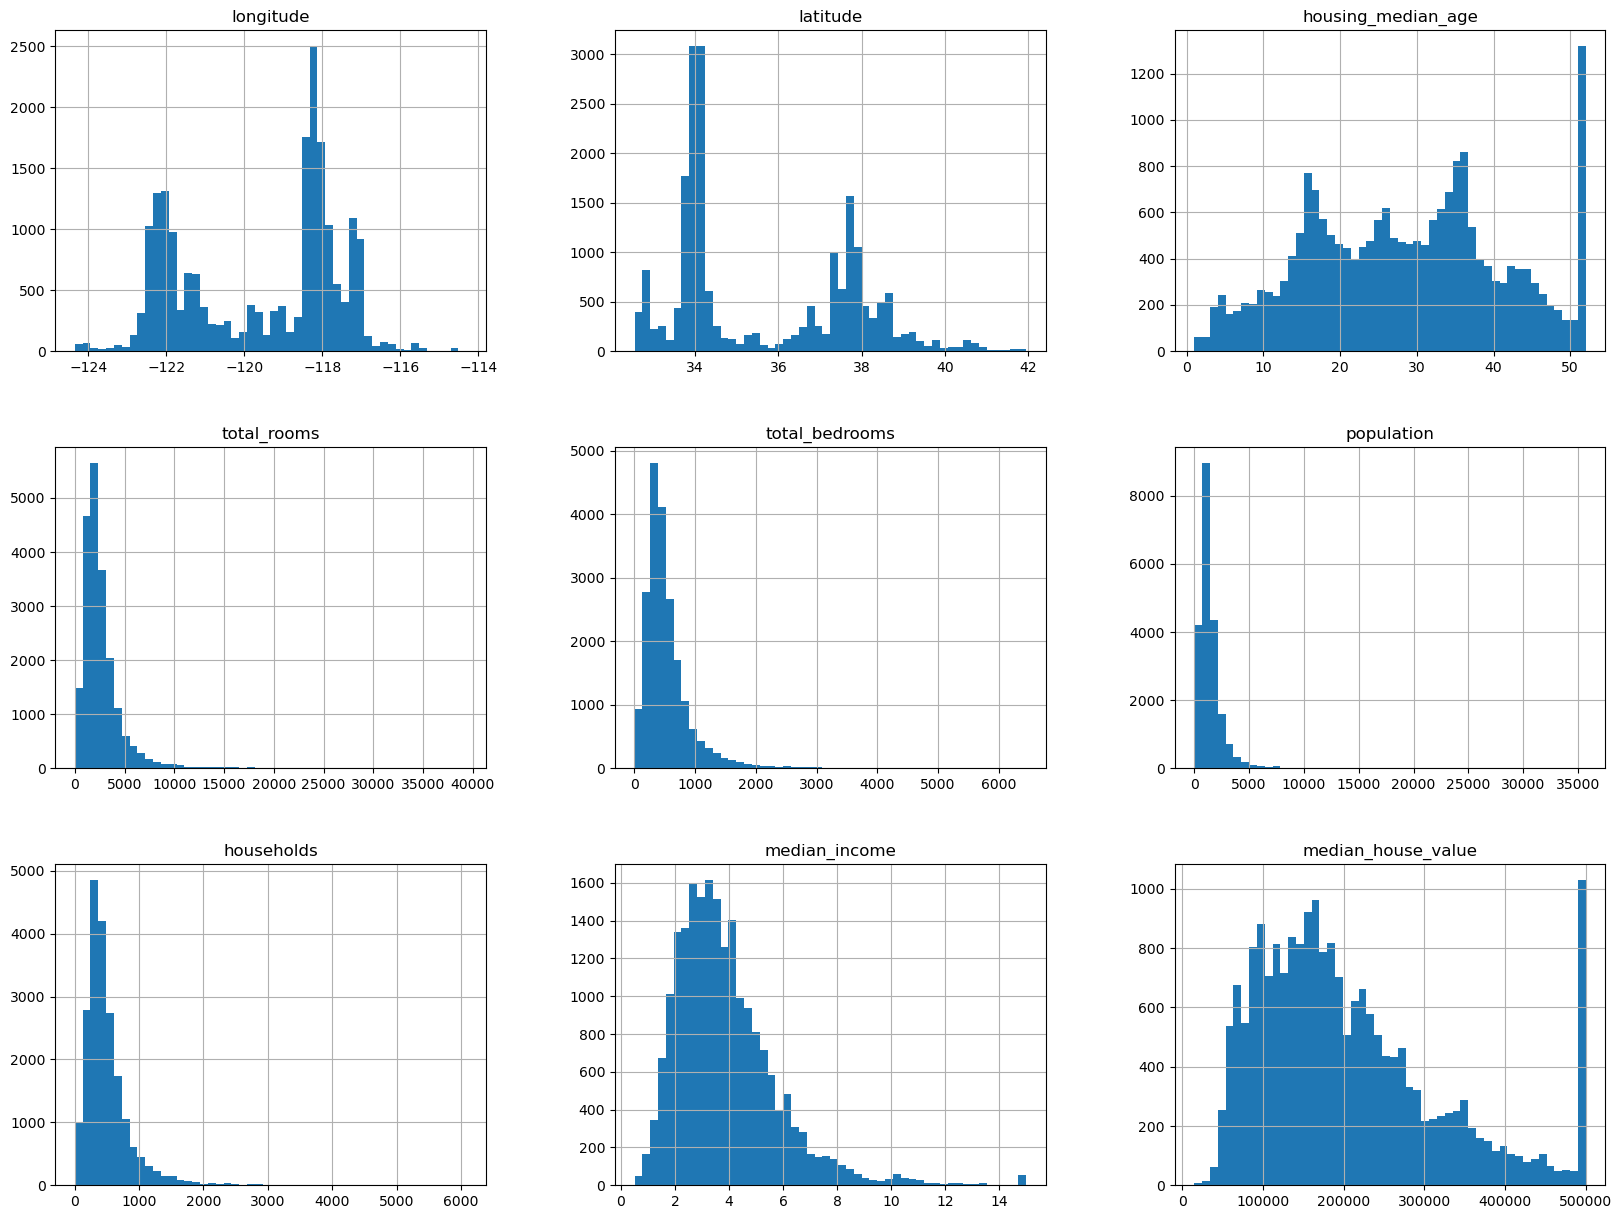

In [7]:
df_clean.hist(bins=50, figsize=(20,15))
plt.show()

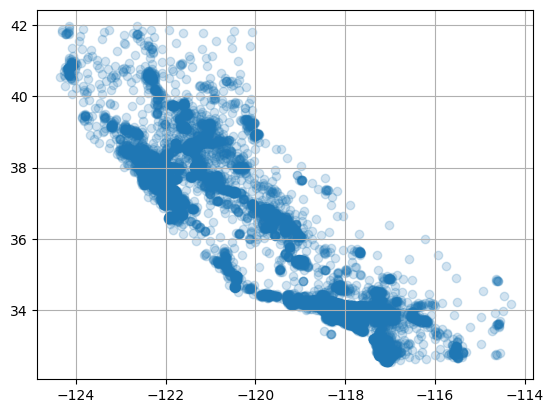

In [8]:
plt.scatter(df_clean['longitude'], df_clean['latitude'], alpha = 0.2)
plt.grid()
plt.show()

In [9]:
df_clean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Confusion Matrix

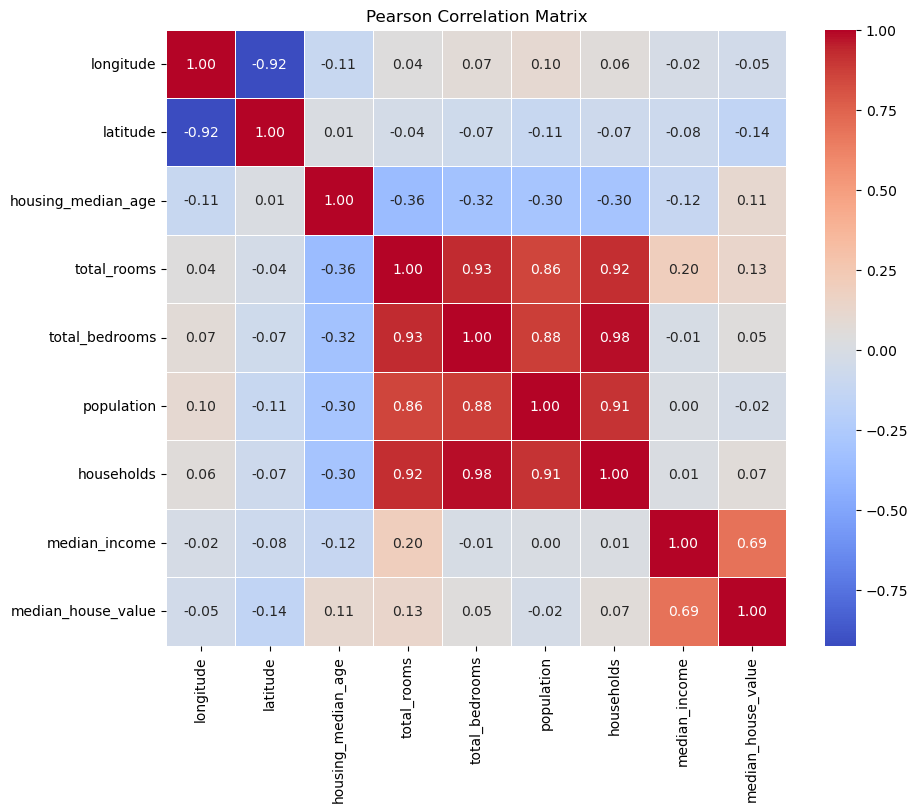

In [11]:
cols_allowed = [col_n for col_n in df_clean.columns if col_n not in ['ocean_proximity']]
correlation_matrix = df_clean[cols_allowed].corr(method='pearson')


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()
l_encoded = l_encoder.fit_transform(df_clean['ocean_proximity'])
df_clean['ocean_proximity'] = list(l_encoded)

print(l_encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


### Filling NaN Values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan ,strategy = 'median')
temp_cols = df_clean.columns
df_clean = imputer.fit_transform(df_clean)
df_clean = pd.DataFrame(df_clean)
df_clean.columns = temp_cols

In [14]:
df_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


### Normalizing the data frame

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
df_clean = pd.DataFrame(mm_scaler.fit_transform(df_clean),columns = df_clean.columns)

In [16]:
from sklearn.model_selection import train_test_split
cols_allowed = ['median_income']
X_train, X_test, y_train, y_test = train_test_split(df_clean[cols_allowed], df_clean['median_house_value'], test_size = 0.2)

### Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred)}  ,  R2 Score: {r2_score(y_test, y_pred)}")

RMSE: 0.02997497983128143  ,  R2 Score: 0.475154547876809


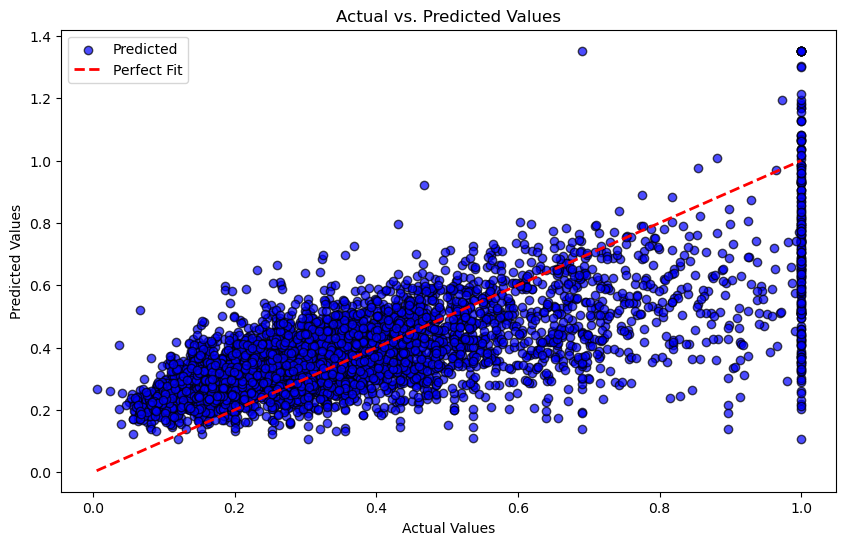

In [28]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label='Predicted')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### Decision Tree Regression Model

In [18]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print(f"Decision Tree Regressor - MSE: {dt_mse}, R^2: {dt_r2}")

Decision Tree Regressor - MSE: 0.04769830674519413, R^2: 0.16482881689659334


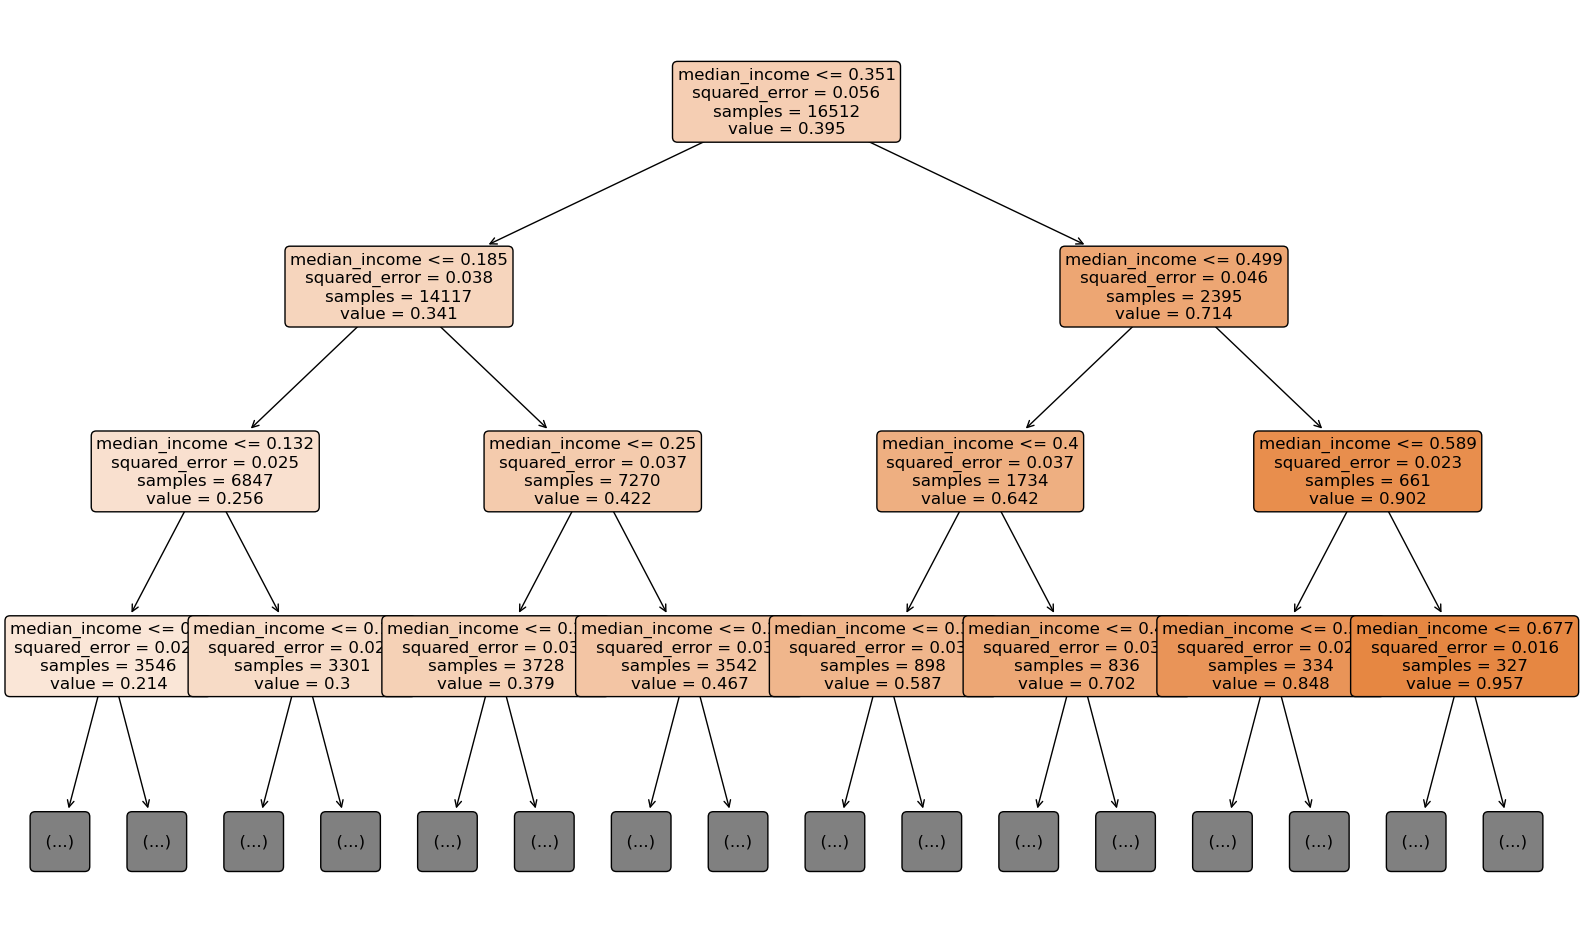

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 12))
plot_tree(dt_model, filled=True, feature_names=['median_income'], rounded=True, max_depth = 3, fontsize=12)
plt.show()

### Random Forest Regressor Model
#### An ensamble learning model

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regressor - MSE: {rf_mse}, R^2: {rf_r2}")

Random Forest Regressor - MSE: 0.039508359596912755, R^2: 0.30823029833542237


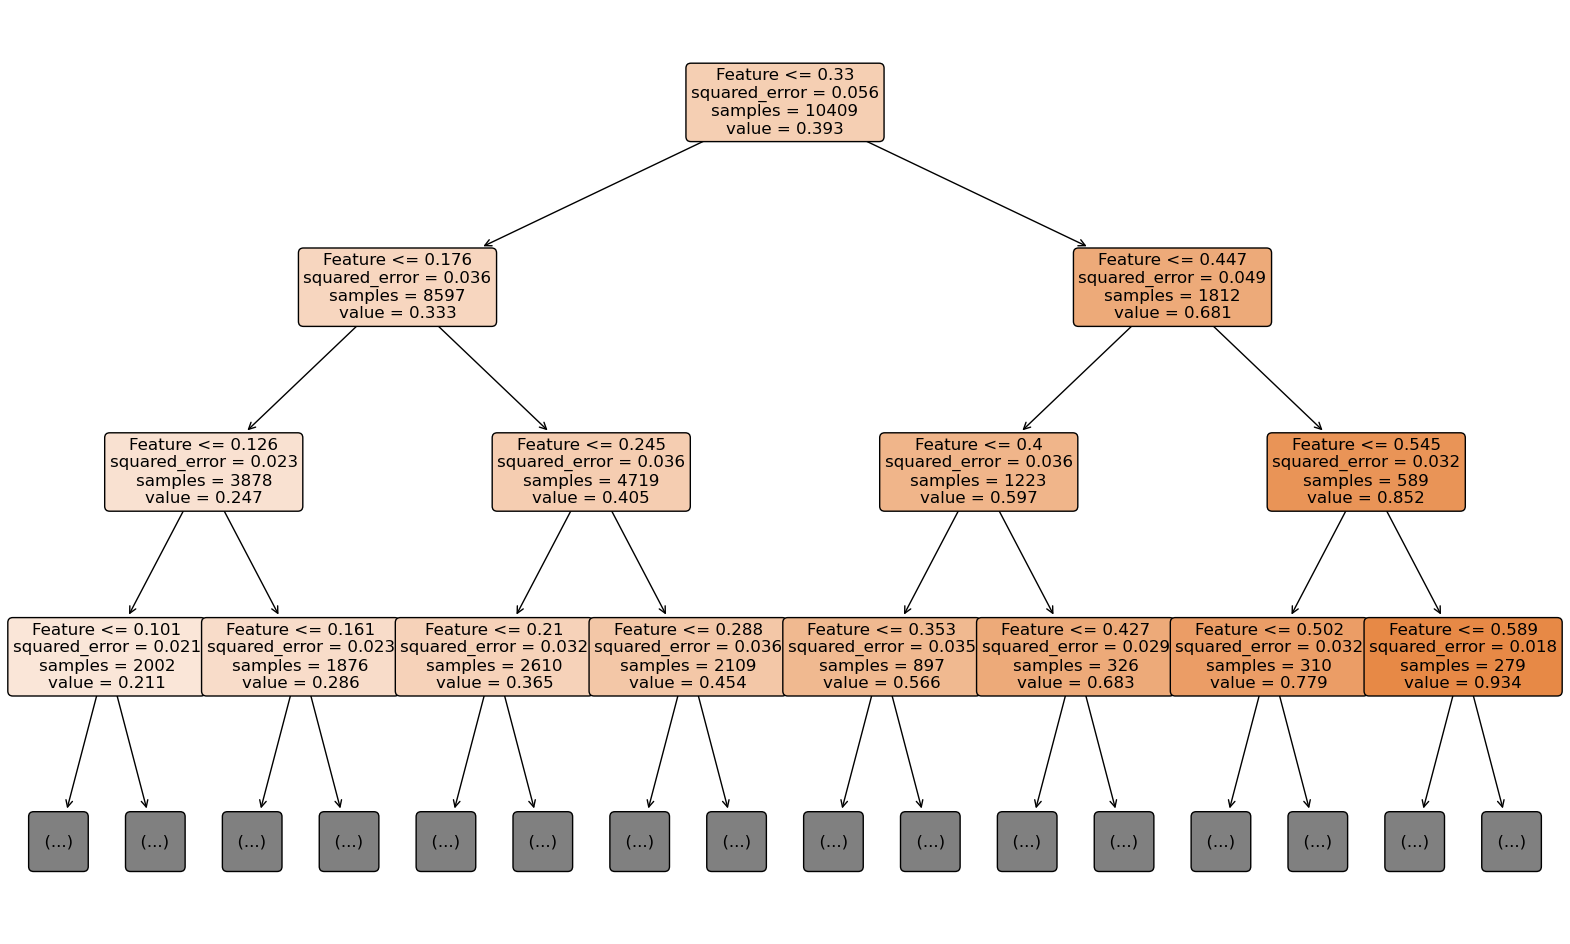

In [31]:
plt.figure(figsize=(20, 12))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=['Feature'], rounded=True, max_depth=3, fontsize=12)
plt.show()